<a href="https://colab.research.google.com/github/Mbetini/Hello/blob/main/20195392%20-%20task%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
#Source: https://www.kaggle.com/dansbecker/your-first-machine-learning-model
#Code modified by Ambi, Cardiff Met University
#ajayal@cardiffmet.ac.uk

#For CIS7031 Module

In [63]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def getNormalizedData(X):
   
    # fit scaler on training data
    norm = MinMaxScaler().fit(X)

    # transform training data
    X_train_norm = norm.transform(X)
    X_train_norm = pd.DataFrame(X_train_norm, columns=X.columns.values)

    X_train_norm;
    return X_train_norm;

In [64]:
from numpy import asarray
from sklearn.datasets import make_regression
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
    
def get_nn_model_function1(n_inputs, n_outputs):
    nn_model = Sequential()

    nn_model.add(tf.keras.layers.Dense(50, activation='relu'))
    nn_model.add(tf.keras.layers.Dense(100, activation='relu'))
    nn_model.add(tf.keras.layers.Dense(50, activation='relu'))
    nn_model.add(tf.keras.layers.Dense(1))

    #nn_model.compile(loss='mean_squared_error', optimizer='adam')
    nn_model.compile('adam', loss='mse', metrics=['mse'])
    return nn_model

# get the model
def get_nn_model_function2(n_inputs, n_outputs):
    network = Sequential()
    #network.add(Dense(8, input_shape=(n_inputs,), activation='relu'))
    #network.add(Dense(8, input_shape=(n_inputs,), kernel_initializer='he_uniform', activation='relu'))
    network.add(Dense(n_inputs, input_shape=(n_inputs,), kernel_initializer='normal', activation='relu'))
    
    network.add(Dense(16, activation='relu'))
    network.add(Dense(6, activation='relu'))
    network.add(Dense(4, activation='relu'))
    
    network.add(Dense(n_outputs, activation='relu'))

    network.compile('adam', loss='mse', metrics=['mse'])
    return network

In [65]:
# save filepath to variable for easier access
#melbourne_file_path = 'melbourne-housing-snapshot/melb_data.csv'
#melbourne_file_path = 'melbourneHousingSnapshot/melb_data.csv'
# read the data and store data in DataFrame titled melbourne_data
#melbourne_data = pd.read_csv(melbourne_file_path) 

#Data Sournce: https://www.kaggle.com/dansbecker/melbourne-housing-snapshot

url="https://raw.githubusercontent.com/ambi1999/mldataset/main/melb_data.csv"
#url="https://github.com/ambi1999/mldataset"
melbourne_data = pd.read_csv(url)



# print a summary of the data in Melbourne data
melbourne_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [66]:
print(melbourne_data.head(20))

        Suburb              Address  ...             Regionname Propertycount
0   Abbotsford         85 Turner St  ...  Northern Metropolitan        4019.0
1   Abbotsford      25 Bloomburg St  ...  Northern Metropolitan        4019.0
2   Abbotsford         5 Charles St  ...  Northern Metropolitan        4019.0
3   Abbotsford     40 Federation La  ...  Northern Metropolitan        4019.0
4   Abbotsford          55a Park St  ...  Northern Metropolitan        4019.0
5   Abbotsford       129 Charles St  ...  Northern Metropolitan        4019.0
6   Abbotsford         124 Yarra St  ...  Northern Metropolitan        4019.0
7   Abbotsford        98 Charles St  ...  Northern Metropolitan        4019.0
8   Abbotsford   6/241 Nicholson St  ...  Northern Metropolitan        4019.0
9   Abbotsford        10 Valiant St  ...  Northern Metropolitan        4019.0
10  Abbotsford   411/8 Grosvenor St  ...  Northern Metropolitan        4019.0
11  Abbotsford      40 Nicholson St  ...  Northern Metropolitan 

In [67]:
melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [68]:
# The Melbourne data has some missing values (some houses for which some variables weren't recorded.)
# We'll learn to handle missing values in a later tutorial.  
# Your Iowa data doesn't have missing values in the columns you use. 
# So we will take the simplest option for now, and drop houses from our data. 
# Don't worry about this much for now, though the code is:

# dropna drops missing values (think of na as "not available")
melbourne_data = melbourne_data.dropna(axis=0)

In [69]:
y = melbourne_data.Price


In [70]:
print(y)

1        1035000.0
2        1465000.0
4        1600000.0
6        1876000.0
7        1636000.0
           ...    
12205     601000.0
12206    1050000.0
12207     385000.0
12209     560000.0
12212    2450000.0
Name: Price, Length: 6196, dtype: float64


In [71]:
#melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude','Car']

In [72]:
X = melbourne_data[melbourne_features]

In [73]:
X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Car
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,1.573596
std,0.971079,0.711362,897.449881,0.075850,0.929947
min,1.000000,1.000000,0.000000,-38.164920,0.000000
25%,2.000000,1.000000,152.000000,-37.855438,1.000000
50%,3.000000,1.000000,373.000000,-37.802250,1.000000
75%,4.000000,2.000000,628.000000,-37.758200,2.000000
max,8.000000,8.000000,37000.000000,-37.457090,10.000000


In [74]:
X.head()

,Rooms,Bathroom,Landsize,Lattitude,Car
1,2,1.0,156.0,-37.8079,0.0
2,3,2.0,134.0,-37.8093,0.0
4,4,1.0,120.0,-37.8072,2.0
6,3,2.0,245.0,-37.8024,0.0
7,2,1.0,256.0,-37.8060,2.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7a5dd08290>,
      dtype=object)

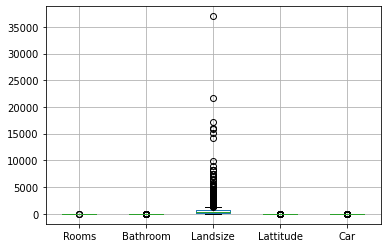

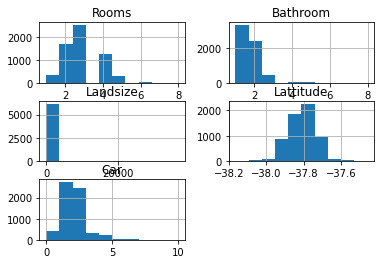

In [75]:
X.boxplot()
X.hist()

In [76]:
#normalize X
# Normalization typically means rescales the values into a range of [0,1]
X_train_norm=getNormalizedData(X);
X_train_norm.describe()
#X_train_norm.head()

,Rooms,Bathroom,Landsize,Lattitude,Car
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,0.275915,0.082334,0.012730,0.504381,0.157360
std,0.138726,0.101623,0.024255,0.107159,0.092995
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.000000,0.004108,0.437227,0.100000
50%,0.285714,0.000000,0.010081,0.512369,0.100000
75%,0.428571,0.142857,0.016973,0.574601,0.200000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
#FIRST MODEL

from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
#melbourne_model = DecisionTreeRegressor(random_state=1)

dt_model = DecisionTreeRegressor(random_state=1)

# Fit model
#melbourne_model.fit(X, y)

#dt_model.fit(X, y)
dt_model.fit(X_train_norm, y)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [78]:
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(dt_model.predict(X.head()))

Making predictions for the following 5 houses:
   Rooms  Bathroom  Landsize  Lattitude  Car
1      2       1.0     156.0   -37.8079  0.0
2      3       2.0     134.0   -37.8093  0.0
4      4       1.0     120.0   -37.8072  2.0
6      3       2.0     245.0   -37.8024  0.0
7      2       1.0     256.0   -37.8060  2.0
The predictions are
[8000000. 8000000. 8000000. 8000000. 8000000.]


In [79]:
#SECOND MODEL

print(X_train_norm.shape[1]);
n_inputs  = X_train_norm.shape[1]
n_outputs= 1

# get model
#nn_model = get_nn_model_function1(n_inputs, n_outputs)
nn_model = get_nn_model_function2(n_inputs, n_outputs)

5


In [80]:
#Train the model
#nn_model.fit(X_train_norm, y, verbose=1, epochs=100)
#nn_model.fit(X_train_norm, y, verbose=0, epochs=100)
nn_model.fit(X_train_norm, y, verbose=1, epochs=20)

Epoch 1/20
194/194 [==============================] - 1s 1ms/step - loss: 1603301561349.2512 - mse: 1603301561349.2512
Epoch 2/20
194/194 [==============================] - 0s 1ms/step - loss: 1652042057780.5129 - mse: 1652042057780.5129
Epoch 3/20
194/194 [==============================] - 0s 1ms/step - loss: 1584194498875.0769 - mse: 1584194498875.0769
Epoch 4/20
194/194 [==============================] - 0s 1ms/step - loss: 1612790766145.6411 - mse: 1612790766145.6411
Epoch 5/20
194/194 [==============================] - 0s 1ms/step - loss: 1555897808423.3845 - mse: 1555897808423.3845
Epoch 6/20
194/194 [==============================] - 0s 1ms/step - loss: 1588306072245.1692 - mse: 1588306072245.1692
Epoch 7/20
194/194 [==============================] - 0s 1ms/step - loss: 1467268669650.0513 - mse: 1467268669650.0513
Epoch 8/20
194/194 [==============================] - 0s 1ms/step - loss: 1355518523507.5283 - mse: 1355518523507.5283
Epoch 9/20
194/194 [============================

In [81]:
print("The predictions using NN are")
print(nn_model.predict(X_train_norm.head()))

The predictions using NN are
[[ 867279.2]
 [1036021.7]
 [1143254. ]
 [1042252.3]
 [ 978786.5]]


In [82]:
print(y.head())

1    1035000.0
2    1465000.0
4    1600000.0
6    1876000.0
7    1636000.0
Name: Price, dtype: float64


In [83]:
y_pred_NN=nn_model.predict(X_train_norm)
y_pred_DT=dt_model.predict(X_train_norm)

#Save predictions in files
np.savetxt('y_pred_NN.csv', y_pred_NN, delimiter=',')
np.savetxt('y_pred_DT.csv', y_pred_DT, delimiter=',')
np.savetxt('X.csv', X, delimiter=',')
np.savetxt('y.csv', y, delimiter=',')

In [84]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
